In [1]:
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
print('Current Directory: '+os.getcwd())

CSV_path = 'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-12_04'
CSV_corrected_path = CSV_path + '\corrected'
print(CSV_corrected_path)

Current Directory: C:\Users\abhim\Documents\Jupyter Notebooks\FGDOS Radiation Testing\HollandPTC-12_04
E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-12_04\corrected


In [3]:
file_s1 ='FGDOS_03F_HIGH_A11_1_Apr_12_18-28-34_s1.csv'
file_s2 ='FGDOS_03F_HIGH_A11_1_Apr_12_18-28-34_s2.csv'
print(file_s1)
print(file_s2)
df_s1 = pd.read_csv('E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-12_04\Arduino_CSV\corrected'+ '\\'+ file_s1 ,encoding='ISO-8859-1')
df_s2 = pd.read_csv('E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-12_04\Arduino_CSV\corrected'+ '\\'+ file_s2 ,encoding='ISO-8859-1')


FGDOS_03F_HIGH_A11_1_Apr_12_18-28-34_s1.csv
FGDOS_03F_HIGH_A11_1_Apr_12_18-28-34_s2.csv


In [5]:
s1 = df_s1.to_numpy()
s2 = df_s2.to_numpy()
df_s1.head()
df_s2.head()

,Time (ms),Sensor,Temperature (° C),Sensor Frequency (Hz),Reference Frequency (Hz),Recharge Register,Window Factor,Sensitivity,Passive,Standby
0,0.9966,2,85,92971,71624,0,7.63,h,0,0
1,232.9318,2,85,93002,71624,0,7.63,h,0,0
2,494.9932,2,85,92956,71609,0,7.63,h,0,0
3,756.7099,2,85,92948,71609,0,7.63,h,0,0
4,1019.3927,2,85,92933,71640,0,7.63,h,0,0


In [6]:
# TID Baseline test and to see annealing effects
energy = 70
dose_rate_air = 0.01  # Gy/min
conv_factor = 0.901   # LET protons in Si / Air @ energy
dose_rate_Si = dose_rate_air * conv_factor

In [7]:
s1[s1[:,3]<90000]

array([[0.0, 1, 86, ..., 'h', 0, 0],
       [244.8641, 1, 86, ..., 'h', 0, 0],
       [506.961, 1, 86, ..., 'h', 0, 0],
       ...,
       [558359.8882, 1, 86, ..., 'h', 0, 0],
       [558884.1587, 1, 86, ..., 'h', 0, 0],
       [559408.3839, 1, 86, ..., 'h', 0, 0]], dtype=object)

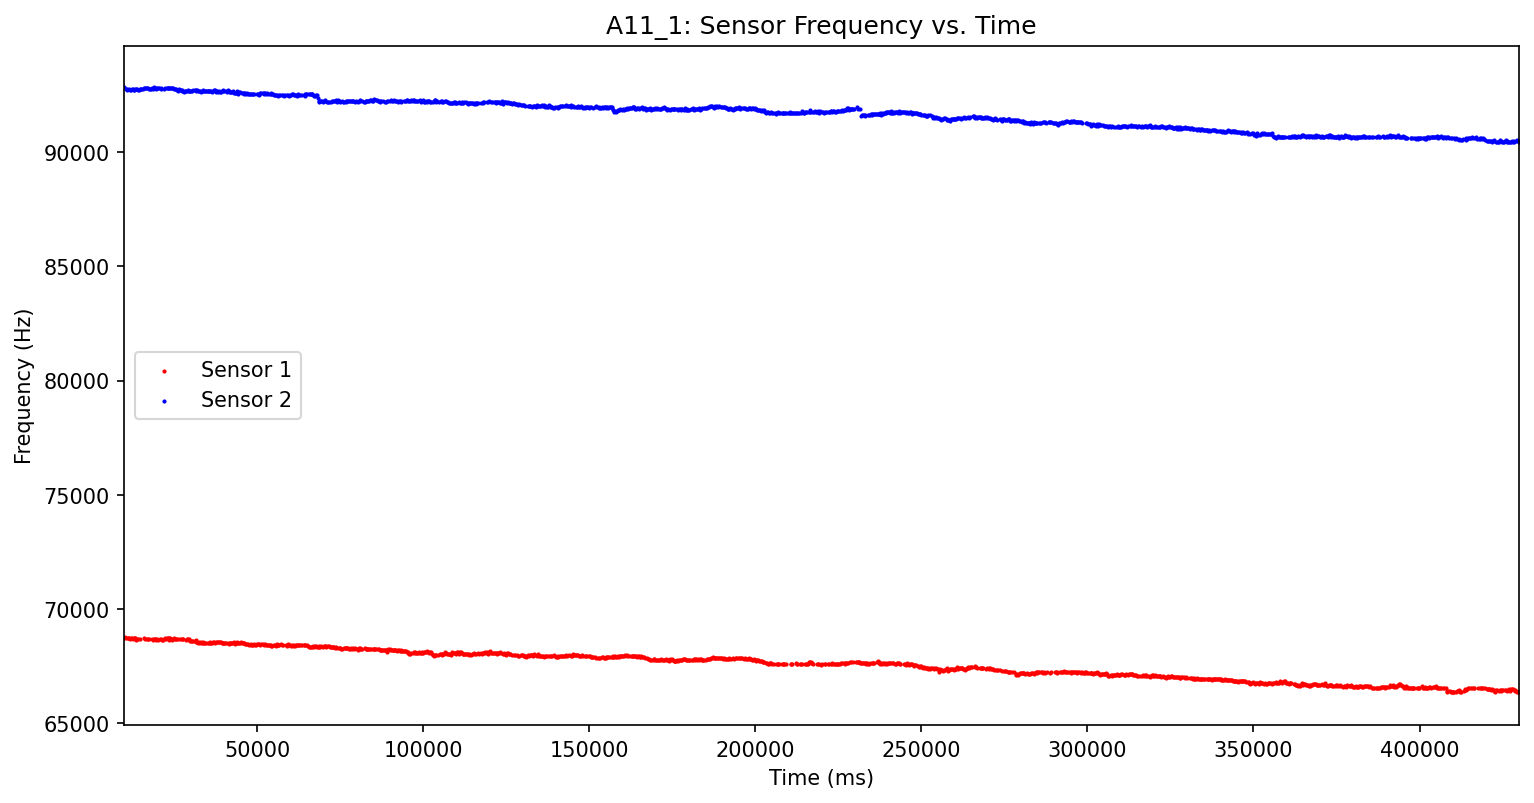

In [10]:
fig_sen_freq = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s1[:,0], s1[:,3],s=1, c='r',label = 'Sensor 1')
plt.scatter(s2[:,0], s2[:,3],s=1, c='b', label = 'Sensor 2')

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
#plt.xlim(0.1e5,4.3e5)
#plt.xlim(ll_2,ul_2)
#plt.ylim(2.0e5,2.3e5)
plt.legend(loc="center left")
plt.title("A11_1: Sensor Frequency vs. Time")
plt.show()

In [21]:
# Sensor 1 irradiation intervals
#s1[(s1[:,0]> 6.2e4) & (s1[:,0]< 9e4)]
ll_1 = 0.1e5
ul_1 = 4.3e5
zone_1 = s1[(s1[:,0]> ll_1) & (s1[:,0]< ul_1)]

ll_2 = 2.5e5
ul_2 = 3.4e5
zone_2 = s1[(s1[:,0]> ll_2) & (s1[:,0]< ul_2)]

In [12]:
# Sensitivity Sensor 1 - Overall
model_s1 = LinearRegression()
t = s1[1:,0].reshape(-1, 1)
s_freq = s1[1:,3].reshape(-1, 1)
model_s1.fit(t,s_freq)
r_sq = model_s1.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s1.intercept_)
print('slope:', model_s1.coef_)
sensitivity_s1 = abs(model_s1.coef_)/(dose_rate_Si/60)

print('Sensor 1 sensitivity in kHz/Gy: ',sensitivity_s1)

coefficient of determination: 0.3017443398327848
intercept: [68215.04567543]
slope: [[-0.00215553]]
Sensor 1 sensitivity in kHz/Gy:  [[14.35424911]]


In [22]:
# Sensitivity Sensor 1 - Zone 1
model_s1 = LinearRegression()
t = zone_1[:,0].reshape(-1, 1)
s_freq = zone_1[:,3].reshape(-1, 1)
model_s1.fit(t,s_freq)
r_sq = model_s1.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s1.intercept_)
print('slope:', model_s1.coef_)
sensitivity_s1 = abs(model_s1.coef_)/(dose_rate_Si/60)

print('Sensor 1 sensitivity in kHz/Gy: ',sensitivity_s1)

coefficient of determination: 0.9867055503353169
intercept: [68737.54990971]
slope: [[-0.00538774]]
Sensor 1 sensitivity in kHz/Gy:  [[35.87838126]]


In [14]:
# Sensitivity Sensor 1 - Zone 2
model_s1 = LinearRegression()
t = zone_2[:,0].reshape(-1, 1)
s_freq = zone_2[:,3].reshape(-1, 1)
model_s1.fit(t,s_freq)
r_sq = model_s1.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s1.intercept_)
print('slope:', model_s1.coef_)
sensitivity_s1 = abs(model_s1.coef_)/(dose_rate_Si/60)

print('Sensor 1 sensitivity in kHz/Gy: ',sensitivity_s1)

coefficient of determination: 0.8963588521593969
intercept: [68803.00368839]
slope: [[-0.00548605]]
Sensor 1 sensitivity in kHz/Gy:  [[36.5331058]]


In [23]:
# Sensor 2 irradiation intervals
ll_1 = 0.1e5
ul_1 = 4.3e5
zone_1 = s2[(s2[:,0]> ll_1) & (s2[:,0]< ul_1)]

ll_2 = 2.0e5
ul_2 = 3.0e5
zone_2 = s2[(s2[:,0]> ll_2) & (s2[:,0]< ul_2)]

In [17]:
# Sensitivity Sensor 2 - Overall
model_s2 = LinearRegression()
t = s2[1:,0].reshape(-1, 1)
s_freq = s2[1:,3].reshape(-1, 1)
model_s2.fit(t,s_freq)
r_sq = model_s2.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s2.intercept_)
print('slope:', model_s2.coef_)
sensitivity_s2 = abs(model_s2.coef_)/(dose_rate_Si/60)

print('Sensor 2 sensitivity in kHz/Gy: ',sensitivity_s2)

coefficient of determination: 0.0005659726997738757
intercept: [91978.01463543]
slope: [[-0.00012826]]
Sensor 2 sensitivity in kHz/Gy:  [[0.85413862]]


In [24]:
# Sensitivity Sensor 2 - Zone 1
model_s2 = LinearRegression()
t = zone_1[:,0].reshape(-1, 1)
s_freq = zone_1[:,3].reshape(-1, 1)
model_s2.fit(t,s_freq)
r_sq = model_s2.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s2.intercept_)
print('slope:', model_s2.coef_)
sensitivity_s2 = abs(model_s2.coef_)/(dose_rate_Si/60)

print('Sensor 2 sensitivity in kHz/Gy: ',sensitivity_s2)

coefficient of determination: 0.9769799438102551
intercept: [92850.53723787]
slope: [[-0.00547032]]
Sensor 2 sensitivity in kHz/Gy:  [[36.42832007]]


In [19]:
# Sensitivity Sensor 2 - Zone 2
model_s2 = LinearRegression()
t = zone_2[:,0].reshape(-1, 1)
s_freq = zone_2[:,3].reshape(-1, 1)
model_s2.fit(t,s_freq)
r_sq = model_s2.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s2.intercept_)
print('slope:', model_s2.coef_)
sensitivity_s2 = abs(model_s2.coef_)/(dose_rate_Si/60)
print('Sensor 2 sensitivity in kHz/Gy: ',sensitivity_s2)

coefficient of determination: 0.8088944611684095
intercept: [93095.11713314]
slope: [[-0.00602751]]
Sensor 2 sensitivity in kHz/Gy:  [[40.13883229]]


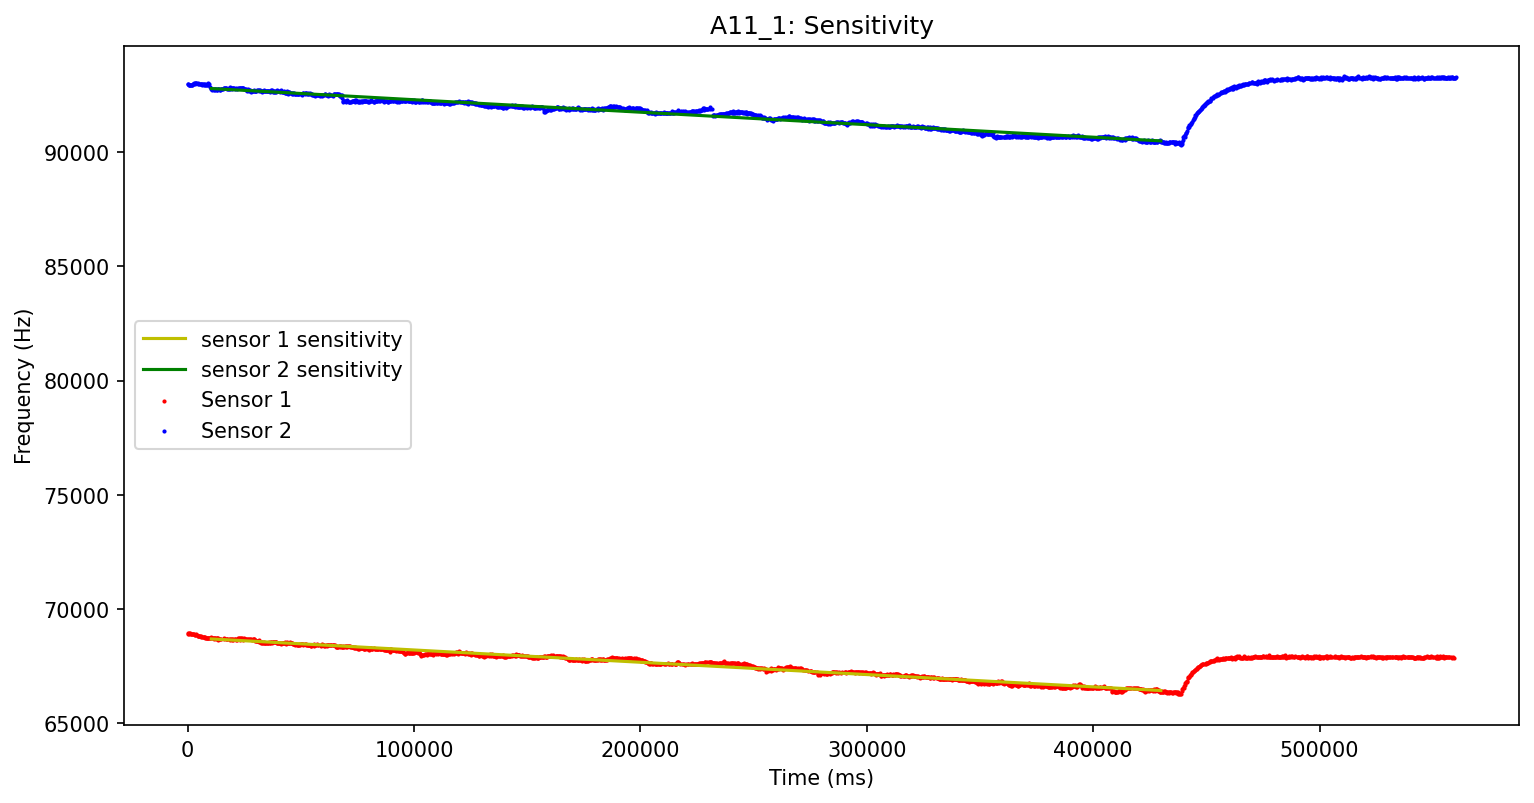

In [25]:
# Plot the linear regression lines
intercept_s1 = model_s1.intercept_
slope_s1 = model_s1.coef_
sensi_s1 = intercept_s1 + t*slope_s1

intercept_s2 = model_s2.intercept_
slope_s2 = model_s2.coef_
sensi_s2 = intercept_s2 + t*slope_s2

fig_sensitivity_freq = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s1[:,0], s1[:,3],s=1, c='r',label = 'Sensor 1')
plt.scatter(s2[:,0], s2[:,3],s=1, c='b', label = 'Sensor 2')
plt.plot(t,sensi_s1,'y-',label='sensor 1 sensitivity')
plt.plot(t,sensi_s2,'g-',label='sensor 2 sensitivity')

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
plt.legend(loc="center left")
plt.title("A11_1: Sensitivity")
plt.show()

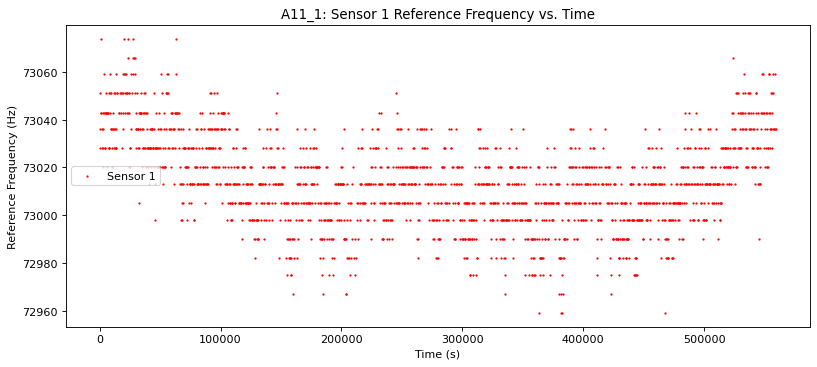

min:  72959
max:  73074
range:  115
mean:  73013.83461538462


In [26]:
fig_ref_freq_s1 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s1[:,0], s1[:,4],s=1, c='r', label = 'Sensor 1')
#plt.scatter(s2[1:,0], s2[1:,4],s=1,label = 'Sensor 2')
#plt.plot(B4_PRE_TEST[1:,0], B4_PRE_TEST[1:,4],"g-",label = 'Reference frequency')

plt.xlabel('Time (s)')
plt.ylabel('Reference Frequency (Hz)')
plt.legend(loc="center left")
plt.title("A11_1: Sensor 1 Reference Frequency vs. Time")
plt.show()
print('min: ',s1[:,4].min())
print('max: ',s1[:,4].max())
print('range: ',s1[:,4].max()-s1[:,4].min())
print('mean: ',s1[:,4].mean())

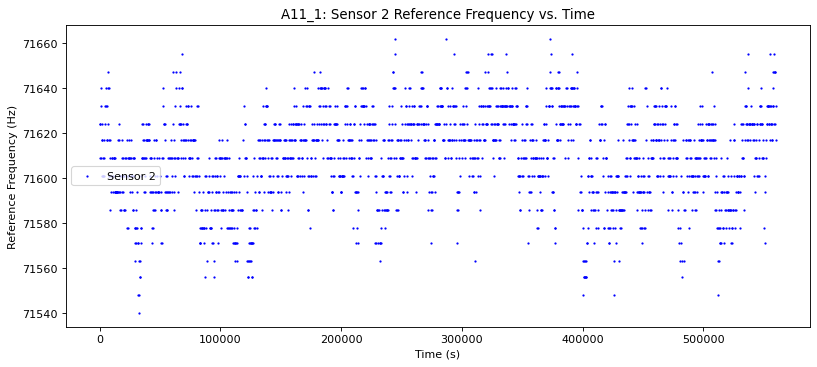

min:  71540
max:  71662
range:  122
mean:  71609.11241970022


In [27]:
fig_ref_freq_s2 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s2[:,0], s2[:,4],s=1, c='b', label = 'Sensor 2')

plt.xlabel('Time (s)')
plt.ylabel('Reference Frequency (Hz)')
plt.legend(loc="center left")
plt.title("A11_1: Sensor 2 Reference Frequency vs. Time")
plt.show()

print('min: ',s2[:,4].min())
print('max: ',s2[:,4].max())
print('range: ',s2[:,4].max()-s2[:,4].min())
print('mean: ',s2[:,4].mean())

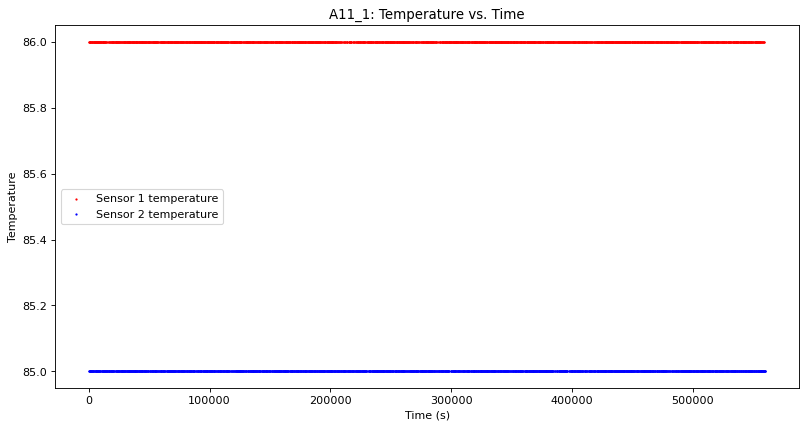

In [28]:
fig_temp = plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(s1[:,0], s1[:,2],s=1,c='r',label = 'Sensor 1 temperature')
plt.scatter(s2[:,0], s2[:,2],s=1,c='b',label = 'Sensor 2 temperature')

plt.xlabel('Time (s)')
plt.ylabel('Temperature')
plt.legend(loc="center left")
plt.title("A11_1: Temperature vs. Time")
plt.show()

In [16]:
s1[:,0].shape
        

(1388,)

In [28]:
#s1[(s1[:,0]> 3e5)]